In [14]:
import requests
from time import sleep

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from collections import defaultdict
import config
import time
from tqdm import tqdm_notebook

In [15]:
class ENV1:
    def __init__(self, url, key):
        self.url = url
        self.key = key

    def reset(self):
        r = requests.get(url=self.url+'/reset',
                     params = {
                         'user_id':self.key,
                     })
        try:
            return r.json()
        except:
            print(r.content)
            raise

    def predict(self, predicted_score):
        r = requests.get(url=self.url + '/predict',
                     params = {
                         'user_id':self.key,
                         'predicted_score':predicted_score
                     })
        try:
            return r.json()
        except:
            print(r.content)
            raise




In [107]:
from models.env1 import Random, DeepMFAgent, CorrelationAgent, Constant, SVDAgent

In [91]:
results = defaultdict(lambda: defaultdict(list)) 
# modelname :   predicted  : list  with shape n_runs x n_steps
#               true       : list  with shape n_runs x n_steps

In [104]:
%%time
ENV_URL = config.ENV1_URL
KEY = config.KEY

env = ENV1(key=KEY, url=ENV_URL)

n_runs = 3
n_steps = 100

models = {
#    'Random' : Random(),
#     'Constant=3' : Constant(3),
#     'CorrelationAgent' : CorrelationAgent(),
#     'SVD' : SVDAgent(),
#     'DeepMFAgent_emb30' : DeepMFAgent(embedding_size=30),
    'DeepMFAgent_emb30_mse_retrain' : DeepMFAgent(embedding_size=30, loss_name='mse', retrain=True, retrain_after=20),
}

for model_name, model in models.items():
    
    model_name_entry = model_name + '_' + time.strftime('%H:%M')
    
    for n in tqdm_notebook(range(n_runs), desc=model_name, leave=True, position=0):
        # init model 
        history = env.reset()
        model.train(history)
        input_data = {
            'next_user' : history['next_user'],
            'next_item' : history['next_item']
        }
        
        true_scores = []
        pred_scores = []
        
        for _ in tqdm_notebook(range(n_steps), desc='run %d' % n, leave=False, position=1):
            time.sleep(0.05)
            
            prediction = model.predict(input_data)
            res = env.predict(prediction) # get res for prediction
            
            input_data = {
                'next_user' : res['next_user'],
                'next_item' : res['next_item']
            }
            true_score = res['rating']
            
            true_scores.append(true_score)
            pred_scores.append(prediction)
            
            model.store_reward(true_score)
            
            
        results[model_name_entry]['true'].append(true_scores)
        results[model_name_entry]['predicted'].append(pred_scores)

Train on 1800 samples, validate on 200 samples
Epoch 1/40
1800/1800 [==============================] - 0s 149us/step - loss: 10.8631 - val_loss: 10.0804
Epoch 2/40
1800/1800 [==============================] - 0s 26us/step - loss: 10.8467 - val_loss: 10.0793
Epoch 3/40
1800/1800 [==============================] - 0s 26us/step - loss: 10.8305 - val_loss: 10.0773
Epoch 4/40
1800/1800 [==============================] - 0s 26us/step - loss: 10.8094 - val_loss: 10.0727
Epoch 5/40
1800/1800 [==============================] - 0s 28us/step - loss: 10.7802 - val_loss: 10.0641
Epoch 6/40
1800/1800 [==============================] - 0s 27us/step - loss: 10.7388 - val_loss: 10.0488
Epoch 7/40
1800/1800 [==============================] - 0s 27us/step - loss: 10.6803 - val_loss: 10.0216
Epoch 8/40
1800/1800 [==============================] - 0s 26us/step - loss: 10.5977 - val_loss: 9.9790
Epoch 9/40
1800/1800 [==============================] - 0s 25us/step - loss: 10.4843 - val_loss: 9.9140
Epoch 10/

Train on 17 samples, validate on 2 samples
Epoch 1/10
17/17 [==============================] - 0s 883us/step - loss: 8.8464 - val_loss: 17.0000
Epoch 2/10
17/17 [==============================] - 0s 481us/step - loss: 8.7962 - val_loss: 17.0000
Epoch 3/10
17/17 [==============================] - 0s 761us/step - loss: 8.7133 - val_loss: 17.0000
Epoch 4/10
17/17 [==============================] - 0s 530us/step - loss: 8.6650 - val_loss: 17.0000
Epoch 5/10
17/17 [==============================] - 0s 579us/step - loss: 8.6007 - val_loss: 17.0000
Epoch 6/10
17/17 [==============================] - 0s 588us/step - loss: 8.5434 - val_loss: 17.0000
Epoch 7/10
17/17 [==============================] - 0s 559us/step - loss: 8.5150 - val_loss: 17.0000
Epoch 8/10
17/17 [==============================] - 0s 1ms/step - loss: 8.4818 - val_loss: 17.0000
Epoch 9/10
17/17 [==============================] - 0s 839us/step - loss: 8.4570 - val_loss: 17.0000
Epoch 10/10
17/17 [==============================]

1800/1800 [==============================] - 0s 22us/step - loss: 2.3533 - val_loss: 3.1483
Epoch 30/40
1800/1800 [==============================] - 0s 22us/step - loss: 2.0525 - val_loss: 2.8676
Epoch 31/40
1800/1800 [==============================] - 0s 25us/step - loss: 1.7883 - val_loss: 2.6152
Epoch 32/40
1800/1800 [==============================] - 0s 25us/step - loss: 1.5571 - val_loss: 2.3986
Epoch 33/40
1800/1800 [==============================] - 0s 22us/step - loss: 1.3567 - val_loss: 2.2045
Epoch 34/40
1800/1800 [==============================] - 0s 30us/step - loss: 1.1860 - val_loss: 2.0305
Epoch 35/40
1800/1800 [==============================] - 0s 23us/step - loss: 1.0387 - val_loss: 1.8845
Epoch 36/40
1800/1800 [==============================] - 0s 23us/step - loss: 0.9119 - val_loss: 1.7550
Epoch 37/40
1800/1800 [==============================] - 0s 24us/step - loss: 0.8066 - val_loss: 1.6454
Epoch 38/40
1800/1800 [==============================] - 0s 25us/step - loss

Train on 17 samples, validate on 2 samples
Epoch 1/10
17/17 [==============================] - 0s 823us/step - loss: 10.7418 - val_loss: 14.5000
Epoch 2/10
17/17 [==============================] - 0s 776us/step - loss: 10.6533 - val_loss: 14.5000
Epoch 3/10
17/17 [==============================] - 0s 806us/step - loss: 10.5754 - val_loss: 14.5000
Epoch 4/10
17/17 [==============================] - 0s 559us/step - loss: 10.5202 - val_loss: 14.5000
Epoch 5/10
17/17 [==============================] - 0s 762us/step - loss: 10.4278 - val_loss: 14.5000
Epoch 6/10
17/17 [==============================] - 0s 660us/step - loss: 10.3842 - val_loss: 14.5000
Epoch 7/10
17/17 [==============================] - 0s 739us/step - loss: 10.3093 - val_loss: 14.5000
Epoch 8/10
17/17 [==============================] - 0s 750us/step - loss: 10.2574 - val_loss: 14.5000
Epoch 9/10
17/17 [==============================] - 0s 724us/step - loss: 10.2118 - val_loss: 14.5000
Epoch 10/10
17/17 [====================

Epoch 29/40
1800/1800 [==============================] - 0s 27us/step - loss: 2.2696 - val_loss: 4.0169
Epoch 30/40
1800/1800 [==============================] - 0s 27us/step - loss: 1.9951 - val_loss: 3.7101
Epoch 31/40
1800/1800 [==============================] - 0s 25us/step - loss: 1.7549 - val_loss: 3.4328
Epoch 32/40
1800/1800 [==============================] - 0s 24us/step - loss: 1.5411 - val_loss: 3.1853
Epoch 33/40
1800/1800 [==============================] - 0s 23us/step - loss: 1.3559 - val_loss: 2.9645
Epoch 34/40
1800/1800 [==============================] - 0s 25us/step - loss: 1.1956 - val_loss: 2.7676
Epoch 35/40
1800/1800 [==============================] - 0s 23us/step - loss: 1.0579 - val_loss: 2.5894
Epoch 36/40
1800/1800 [==============================] - 0s 25us/step - loss: 0.9397 - val_loss: 2.4276
Epoch 37/40
1800/1800 [==============================] - 0s 25us/step - loss: 0.8382 - val_loss: 2.2883
Epoch 38/40
1800/1800 [==============================] - 0s 25us

Train on 17 samples, validate on 2 samples
Epoch 1/10
17/17 [==============================] - 0s 879us/step - loss: 5.6693 - val_loss: 2.5000
Epoch 2/10
17/17 [==============================] - 0s 779us/step - loss: 5.4433 - val_loss: 2.5000
Epoch 3/10
17/17 [==============================] - 0s 797us/step - loss: 5.2380 - val_loss: 2.5000
Epoch 4/10
17/17 [==============================] - 0s 718us/step - loss: 5.0189 - val_loss: 2.5000
Epoch 5/10
17/17 [==============================] - 0s 711us/step - loss: 4.8095 - val_loss: 2.5000
Epoch 6/10
17/17 [==============================] - 0s 767us/step - loss: 4.6548 - val_loss: 2.5000
Epoch 7/10
17/17 [==============================] - 0s 777us/step - loss: 4.5118 - val_loss: 2.5000
Epoch 8/10
17/17 [==============================] - 0s 769us/step - loss: 4.3741 - val_loss: 2.5000
Epoch 9/10
17/17 [==============================] - 0s 680us/step - loss: 4.2624 - val_loss: 2.5000
Epoch 10/10
17/17 [==============================] - 0s 8

In [105]:
from utils import plot_model_moving_mse_mae

,Model,mae,mse
3,SVD_01:59,0.945696,1.416457
5,DeepMFAgent_emb30_mse_retrain_02:05,1.057065,1.798108
2,CorrelationAgent_01:56,1.069145,1.862257
4,DeepMFAgent_emb30_02:03,1.118987,2.064639
1,Constant=3_01:56,1.270000,2.170000
0,Random_01:55,1.656667,4.170000


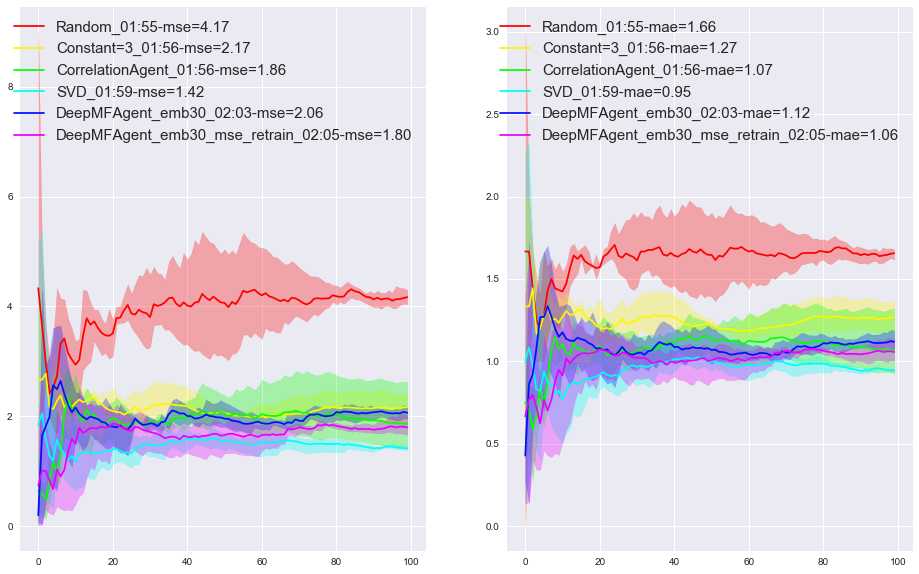

In [106]:
plot_model_moving_mse_mae(results)